In [2]:
# Import statements
import pandas as pd
import textblob
from textblob import Word, TextBlob
import nltk
from nltk.corpus import stopwords
import re # regular expression
import os

import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
gc=pd.read_csv(r"C:\Users\HIMANSHU MISHRA\Desktop\gender-classifier.csv",encoding='latin-1')

In [4]:
gc.shape

(20050, 26)

In [5]:
gc.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN


In [6]:
gc.duplicated().sum()

0

In [7]:
gc.describe().T

,count,mean,std,min,25%,50%,75%,max
_unit_id,20050.0,8.157294e+08,6.000801e+03,8.157192e+08,8.157243e+08,8.157294e+08,8.157345e+08,8.157580e+08
_trusted_judgments,20050.0,3.615711e+00,1.233189e+01,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,2.740000e+02
gender:confidence,20024.0,8.827556e-01,1.914031e-01,0.000000e+00,6.778000e-01,1.000000e+00,1.000000e+00,1.000000e+00
profile_yn:confidence,20050.0,9.932210e-01,4.716777e-02,6.272000e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
fav_number,20050.0,4.382202e+03,1.251858e+04,0.000000e+00,1.100000e+01,4.560000e+02,3.315500e+03,3.416210e+05
retweet_count,20050.0,7.940150e-02,2.649751e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.300000e+02
tweet_count,20050.0,3.892469e+04,1.168371e+05,1.000000e+00,2.398000e+03,1.144150e+04,4.002750e+04,2.680199e+06
tweet_id,20050.0,6.587350e+17,5.000124e+12,6.587300e+17,6.587300e+17,6.587300e+17,6.587400e+17,6.587400e+17


In [8]:
gc.description

0                                    i sing my own rhythm.
1        I'm the author of novels filled with family dr...
2                      louis whining and squealing and all
3        Mobile guy.  49ers, Shazam, Google, Kleiner Pe...
4        Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...
                               ...                        
20045                                                 (rp)
20046    Whatever you like, it's not a problem at all. ...
20047    #TeamBarcelona ..You look lost so you should f...
20048    Anti-statist; I homeschool my kids. Aspiring t...
20049                       Teamwork makes the dream work.
Name: description, Length: 20050, dtype: object

In [9]:
gc1 = pd.concat([gc.gender,gc.description],axis=1)
print(gc1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 2 columns):
gender         19953 non-null object
description    16306 non-null object
dtypes: object(2)
memory usage: 313.4+ KB
None


In [10]:
gc1.head()

,gender,description
0,male,i sing my own rhythm.
1,male,I'm the author of novels filled with family dr...
2,male,louis whining and squealing and all
3,male,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe..."
4,female,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...


In [11]:
gc1.shape

(20050, 2)

In [12]:
gc1.nunique()

gender             4
description    15140
dtype: int64

In [13]:
gc1["gender"].value_counts()

female     6700
male       6194
brand      5942
unknown    1117
Name: gender, dtype: int64

In [14]:
#identifying missing values 
def miss_identify(data):
    return data.isnull().sum()/len(data)*100
miss_identify(gc1)

gender          0.483791
description    18.673317
dtype: float64

In [16]:
import numpy as np
gc1["gender"]=pd.DataFrame(np.where(gc1["gender"]=='male',1,0))

In [17]:
gc1

,gender,description
0,1,i sing my own rhythm.
1,1,I'm the author of novels filled with family dr...
2,1,louis whining and squealing and all
3,1,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe..."
4,0,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...
...,...,...
20045,0,(rp)
20046,1,"Whatever you like, it's not a problem at all. ..."
20047,1,#TeamBarcelona ..You look lost so you should f...
20048,0,Anti-statist; I homeschool my kids. Aspiring t...


In [18]:
gc1

,gender,description
0,1,i sing my own rhythm.
1,1,I'm the author of novels filled with family dr...
2,1,louis whining and squealing and all
3,1,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe..."
4,0,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...
...,...,...
20045,0,(rp)
20046,1,"Whatever you like, it's not a problem at all. ..."
20047,1,#TeamBarcelona ..You look lost so you should f...
20048,0,Anti-statist; I homeschool my kids. Aspiring t...


In [19]:
gc2=gc1.dropna(axis = 0)


In [20]:
gc2.shape

(16306, 2)

In [21]:
#here we are verifying that missing records are dropped or not. 
def miss_identify(data):
    return data.isnull().sum()/len(data)*100
miss_identify(gc2)

gender         0.0
description    0.0
dtype: float64

In [22]:
gc2.head()

,gender,description
0,1,i sing my own rhythm.
1,1,I'm the author of novels filled with family dr...
2,1,louis whining and squealing and all
3,1,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe..."
4,0,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...


In [23]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer


In [24]:
gc2["description"][1]

"I'm the author of novels filled with family drama and romance."

In [25]:
gc2["description"][4]

'Ricky Wilson The Best FRONTMAN/Kaiser Chiefs The Best BAND Xxxx Thank you Kaiser Chiefs for an incredible year of gigs and memories to cherish always :) Xxxxxxx'

In [27]:
               
# Cleaning the texts
import re
import nltk as nlp
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

dlist = []
for description in gc2.description:
    # regular expression RE mesela "[^a-zA-Z]"
    description = re.sub("[^a-zA-Z]"," ",description)
    description = description.lower()   
    description = nltk.word_tokenize(description)
    description = [ word for word in description if not word in set(stopwords.words("english"))]
    lemma = nlp.WordNetLemmatizer()
    description = [ lemma.lemmatize(word) for word in description]           
    description = " ".join(description)                                      
    dlist.append(description)
    
dlist
   

['sing rhythm',
 'author novel filled family drama romance',
 'louis whining squealing',
 'mobile guy er shazam google kleiner perkins yahoo sprint pc airtouch air force stanford gsb uva dad husband brother golfer',
 'ricky wilson best frontman kaiser chief best band xxxx thank kaiser chief incredible year gig memory cherish always xxxxxxx',
 'know',
 'global marketplace image video music sharing photo inspiration design tip video creative community',
 'secret getting ahead getting started',
 'pll fan crazy mcd ramen bae',
 'renaissance art historian university nottingham fuelled haribo partial coffee soft spot renaissance china national teaching fellow',
 'clean food taste great providing energy nutrient guilt granola vegan paleo friendly option cert organic gf kosher',
 'highly extraordinary auction',
 'senior xi xii mmxiv',
 'come join fastest blog network online today http co mfpa vgk http co mpuuqtyf g cover credit repair credit card bankruptcy',
 'im p bo burnham disney world',
 

In [28]:
# Creating the TF-IDF model
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer()
X = cv.fit_transform(description_list).toarray()

In [29]:
type(X)

numpy.ndarray

In [30]:
X.shape

(16306, 29491)

In [31]:
data_features = pd.DataFrame(X)
data_features.shape

(16306, 29491)

In [32]:
data_features #input matrix

,0,1,2,3,4,5,6,7,8,9,...,29481,29482,29483,29484,29485,29486,29487,29488,29489,29490
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16301,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16302,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16303,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16304,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
y=pd.get_dummies(gc2['gender']) #dependent variable 


In [34]:
y

,0,1
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0
...,...,...
20045,1,0
20046,0,1
20047,0,1
20048,1,0


In [35]:
y = gc2.iloc[:,0].values
x = data_features

Text(0.5, 1.0, 'male or female classes')

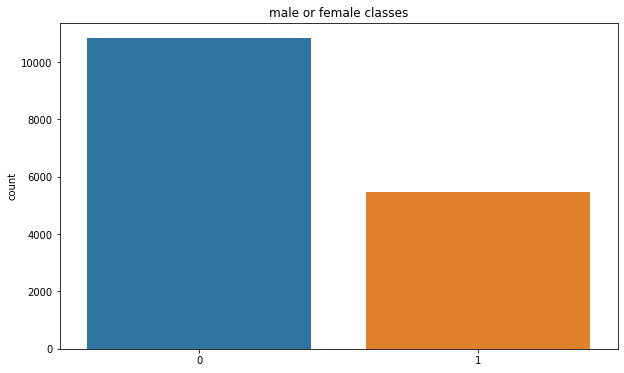

In [36]:

import seaborn as sns
import matplotlib.pyplot as plt
# visualize number of digits classes
plt.figure(figsize=(10,6))
sns.countplot(y)
plt.title("male or female classes")

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

In [38]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [39]:
nb.score(x_train,y_train) 

0.8353265869365225

In [41]:
nb.score(x_test,y_test)

0.5226854690374003

In [44]:
#%% prediction
y_pred = nb.predict(x_train)

In [45]:
y_pred

array([0, 0, 1, ..., 0, 1, 1])

In [46]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train,y_pred)

In [47]:
cm

array([[6518, 2148],
       [   0, 4378]], dtype=int64)

In [48]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_pred)


0.8353265869365225

# MODEL IS overfit so buildibg logistic regression 

In [49]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(x_train, y_train)
classifier.score(x_train, y_train)



0.7953081876724931

In [50]:
classifier.score(x_test,y_test)

0.7060085836909872

# NOTE : in logistic model is not overfit in logistic regression
    

In [55]:
y_pred_lg = classifier.predict(x_train)

In [56]:
y_pred_lg

array([0, 0, 0, ..., 0, 0, 0])

In [58]:
from sklearn.metrics import confusion_matrix
cm_lg = confusion_matrix(y_train,y_pred_lg)
cm_lg

array([[8518,  148],
       [2522, 1856]], dtype=int64)

In [59]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train,y_pred_lg)

0.7034298171933034

# roc_auc_score between 70 to 80 % thus this is good model fit ,we can deploy 

In [60]:
from sklearn.metrics import precision_score
precision_score(y_train,y_pred_lg)

0.9261477045908184